# Link prediction

In [1]:
!pip install networkx
!pip install linkpred

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 3.2 MB/s eta 0:00:01


In [1]:
import pickle
import networkx as nx
from random import seed, sample
import linkpred
from matplotlib import pyplot as plt

In [2]:
M = nx.read_pajek('../data/obj/biggerSub.net')

In [3]:
_SEED = 10
seed(_SEED)

In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)# create weighted graph from M

In [5]:
G.remove_edges_from(list(nx.selfloop_edges(G)))

# Create test network
test = G.subgraph(sample(G.nodes(), int(0.3*len(G.nodes))))

# Exclude test network from learning phase
training = G.copy()
training.remove_edges_from(test.edges())

In [6]:
jaccard = linkpred.predictors.Jaccard(training, excluded=training.edges())
jaccard_results = jaccard.predict()

In [7]:
test_set = set(linkpred.evaluation.Pair(u, v) for u, v in test.edges())
evaluation = linkpred.evaluation.EvaluationSheet(jaccard_results, test_set)

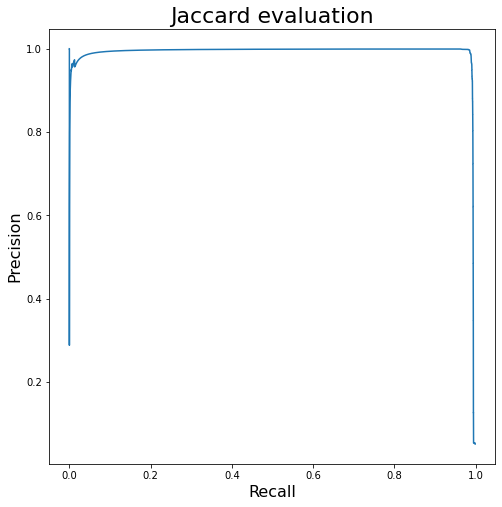

In [20]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.plot(evaluation.recall(), evaluation.precision())
ax.set_xlabel('Recall', fontsize=16)
ax.set_ylabel('Precision', fontsize=16)
plt.title('Jaccard evaluation', fontsize=22)

# fig.plot(evaluation.recall(), evaluation.precision())
plt.show()

In [16]:
evaluation.recall().mean()

0.9696154107831462

In [17]:
evaluation.precision().mean()

0.20086419578696388